Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [45]:
import requests
import pandas as pd
url = "https://api.foursquare.com/v3/places/search"
params = {
    "ll": "48.8588548,2.347035",
    "radius": 1000,
    "fields": "categories,rating,geocodes,categories,location,name,fsq_id,stats,price",
    "limit": 50
}
headers = {
    "accept": "application/json",
    "Authorization": "fsq3aB5c7PNhhqT23DewFyJ7Easfex4oG/ymaLVxSui+7VE="
}
response = requests.get(url, params=params, headers=headers)
data = response.json()
ratings = [place.get('rating', 0) for place in data.get('results', [])]
if response.status_code == 200:
    data = response.json()
    poi_details = []
    for poi in data.get('results', []):
        idd = poi.get('fsq_id', 0)
        name = poi.get('name', 'no data')
        rating = poi.get('rating', 0)
        location = poi.get('location', {}).get('formatted_address', 'no data')
        
        poi_info = {
            "id": idd,
            "name": name,
            "rating": rating,
            "location": location
        }

        poi_details.append(poi_info)
df1 = pd.DataFrame(poi_details)
API_KEY = "V6RfSQbnmYuJu5EBRgRikoCk-ScXUU38_M1rKj4CxeKGqmL0nGd1iLhkloqMVAsUK7uYrlpyE4OrIDRIrNO5lEPo60qcEEitGxX7tNBr8hRNu4RTHSKV_IztV2h7ZHYx"
BASE_URL = "https://api.yelp.com/v3"
term = "bar"
location = "Paris"
headers = {
    "Authorization": f"Bearer {API_KEY}"
}
params = {
    "term": term,
    "location": location
}
url = f"{BASE_URL}/businesses/search"
response = requests.get(url, headers=headers, params=params)
data = response.json()
names = []
ratings = []
addresses = []
phones = []
for business in data["businesses"]:
    names.append(business['name'])
    ratings.append(business.get('rating',0))
    addresses.append(', '.join(business['location']['display_address']))
    phones.append(business.get('phone', 'no data'))

df2 = pd.DataFrame({
    'Name': names,
    'Rating': ratings,
    'Address': addresses,
    'Phone': phones
})
combined_df = pd.concat([df1, df2], ignore_index=True)

import requests, pandas as pd
response = requests.get('http://api.citybik.es/v2/networks')
data = response.json()
for network in data['networks']:
    if network['location']['city'] == 'Paris':
        paris_network = network
            
paris_endpoint = paris_network['href']
paris_response = requests.get(f"http://api.citybik.es" + paris_endpoint)
paris_data = paris_response.json()
stations = paris_data['network']['stations']
df3 = pd.DataFrame(stations)
paris_data = paris_response.json()
stations = paris_data['network']['stations']
df3 = pd.DataFrame(stations)
df3 = df3.drop(columns='extra')
combined_df = pd.concat([combined_df, df3], ignore_index=True)
df_clean_rows = combined_df.dropna(how='all')
df_clean_cols = df_clean_rows.dropna(axis=1, how='all')
df = df_clean_cols
df['name'] = df['name'].fillna(df['Name'])
df_non = df.drop(columns=['Name'])
print(df_non)

                                    id                                name  \
0             4b27effef964a5209a8c24e3                   Au Vieux Comptoir   
1             4e0766702271dfa46baee474                              Rivoli   
2             4d71280e1529a143391197a0                       Bières Cultes   
3             4b8ebd9df964a5203c3433e3                 Théâtre du Châtelet   
4             4adcda08f964a520ab3321e3                    Duc des Lombards   
...                                ...                                 ...   
1515  feddaa6b527125b9f2d1411daeef4c7c  Charles de Gaulle - Louis Philippe   
1516  df9e51f77064303346c915ac34d985aa                    Mairie de Sceaux   
1517  733584ccd52e8d354e5f533f58bbf1a5      Henri Barbusse - Marcel Cachin   
1518  77323e3c46650ca40881e62356cdd809      Charlot - Stade Gabriel Voisin   
1519  362591c2bcac06632f54009ef8c2f242             Quai du docteur Dervaux   

      rating                                           location

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

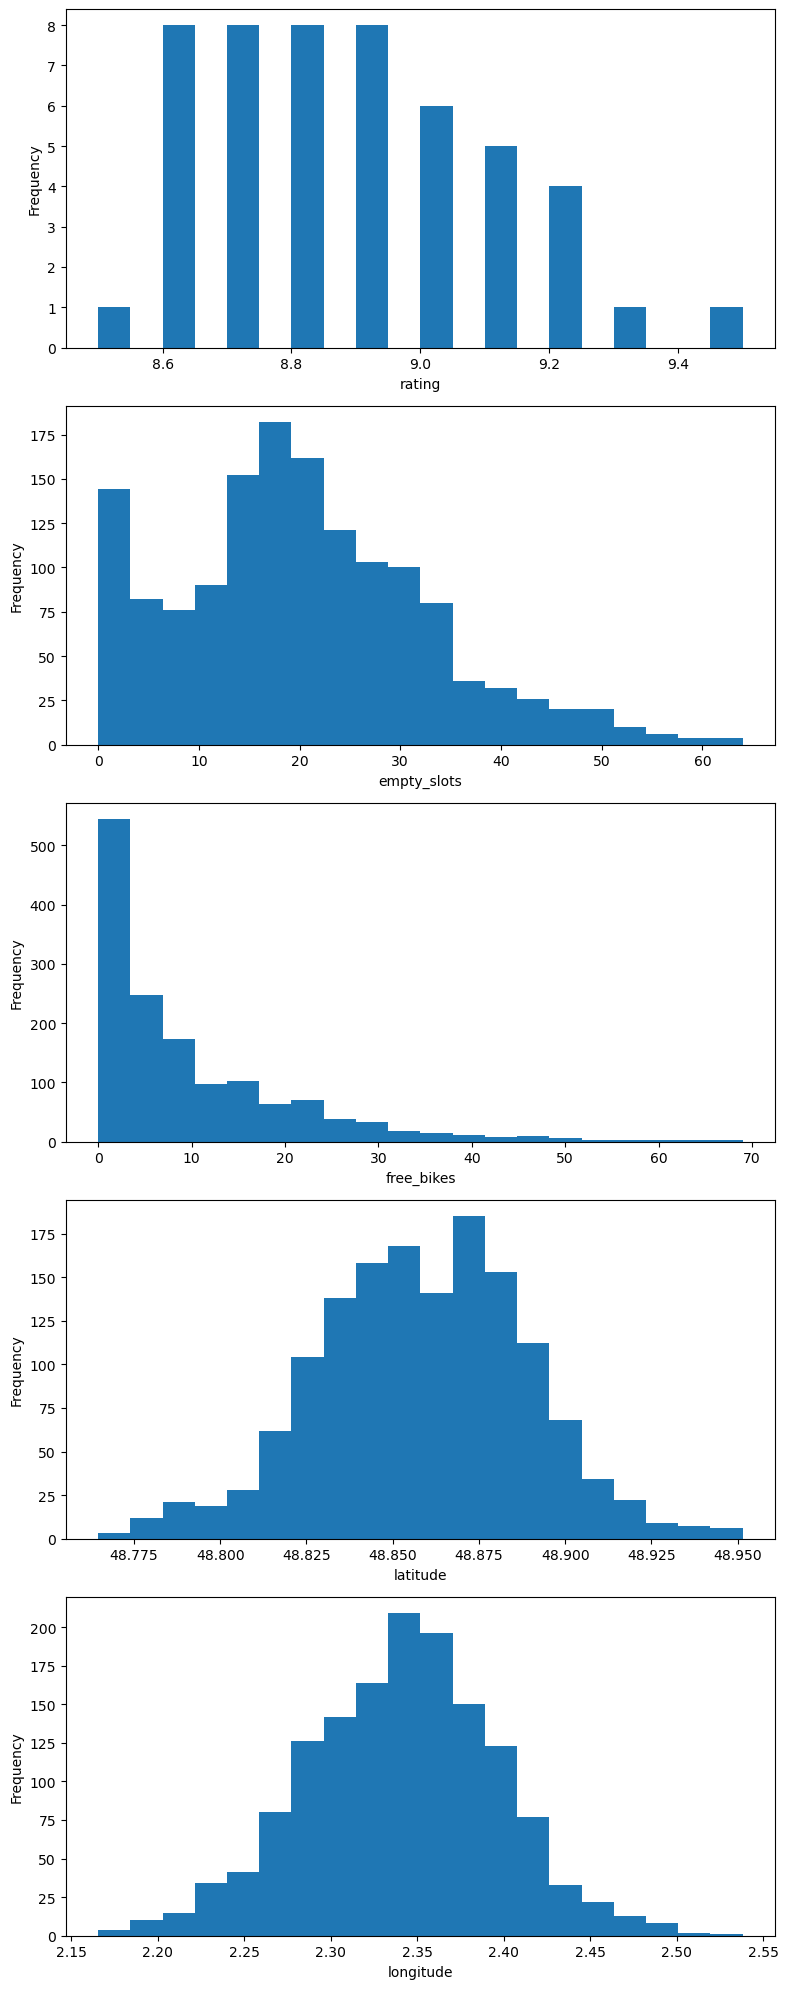

In [46]:
import matplotlib.pyplot as plt
variables = ['rating', 'empty_slots', 'free_bikes', 'latitude', 'longitude']
fig, axes = plt.subplots(len(variables), 1, figsize=(8, len(variables)*4))
for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(df_clean_cols[var].dropna(), bins=20)
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

#lattitude and longitude are close to normal distribution so they should be pretty random.
#the other data is skewed so if outliers cant be found using EDA i should apply an appropraite algorithm to account for that

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [50]:
import sqlite3
import pandas as pd

df_non.drop("rating", axis=1, inplace=True)
df_non.to_sql('results', sqlite3.connect(r'C:\Users\juju\Desktop\statistical_modelling-_with_python\data\results.db'), if_exists='replace', index=False)



1520

Look at the data before and after the join to validate your data.

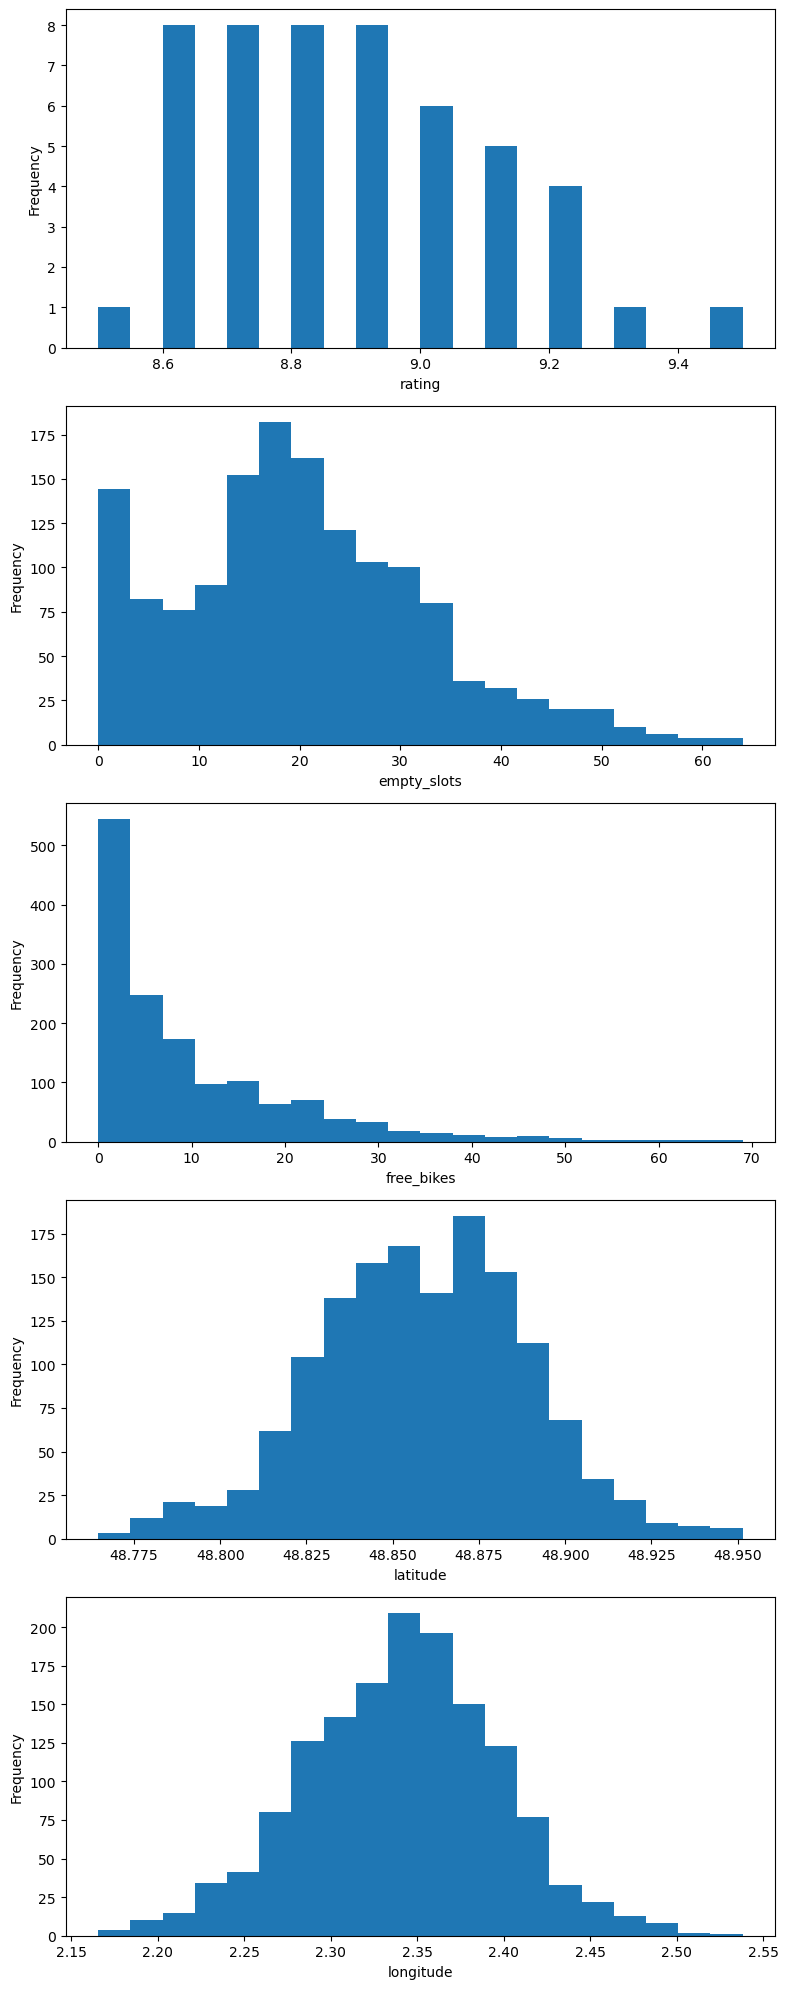

In [51]:
import matplotlib.pyplot as plt
variables = ['rating', 'empty_slots', 'free_bikes', 'latitude', 'longitude']
fig, axes = plt.subplots(len(variables), 1, figsize=(8, len(variables)*4))
for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(df_clean_cols[var].dropna(), bins=20)
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
import sqlite3
import pandas as pd
conn = sqlite3.connect(r'C:\Users\juju\Desktop\statistical_modelling-_with_python\data\results.db')
df_results = pd.read_sql_query("SELECT * FROM results", conn)
print("\nData from 'results' table:")
print(df_results.info())
conn.close()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Preprocess the data
df = df_results.drop(["id", "name", "location", "Address", "Phone", "timestamp"], axis=1)
df = df.dropna()  # Drop rows with missing values or use imputation techniques

# Split the data into features (X) and target variable (y)
X = df.drop("free_bikes", axis=1)
y = df["free_bikes"]

# Choose a regression algorithm and build the model
model = LinearRegression()

# Print the model summary
print(model)
